 # Check current working directory

In [76]:
#%pip install "numpy<2.0"
!pwd
print()
!ls
print()
!cat cryspy.in

/Users/kongkitimanon2024/Downloads/2025_02_18_CrySPY-1.4.0b10/CrySPY_utility/examples/interactive

CuAu.POSCAR              cryspy_interactive.ipynb newplot.png
README                   data                     trash
cryspy.in                input_examples           umap (1).ipynb
cryspy.stat              lock_cryspy              work

[basic]
algo = RS
calc_code = ASE
tot_struc = 100
nstage = 1
njob = 100
jobcmd = zsh
jobfile = job_cryspy

[structure]
atype = Cu Au
nat = 8 8
natot = 16


[ASE]
ase_python = ase_in.py

[option]


# To ignore warnings
if you want to ignore warnings, comment out the following lines

In [77]:
#import warnings
#warnings.filterwarnings('ignore')

# Import

In [78]:
# ---------- import
from cryspy.interactive import action

# Backup and clean

Backup  
[CrySPY Document > CrySPY > Features > Backup](https://tomoki-yamashita.github.io/CrySPY_doc/features/backup/index.html)

In [79]:
# ---------- backup
#action.backup()

Clean  
[CrySPY Document > CrySPY > Features > Clean](https://tomoki-yamashita.github.io/CrySPY_doc/features/clean/index.html)

After running action.clean(), make sure to restart the kernel.
Otherwise, log files will no longer be output.

In [80]:
# ---------- clean
action.clean()

# Initialize CrySPY

In [81]:
# ---------- initial structure generation
action.initialize()

[2025-05-20 15:46:53,019][cryspy_init][INFO] 


Start CrySPY 1.4.0b10


[2025-05-20 15:46:53,024][cryspy_init][INFO] # ---------- Library version info


[2025-05-20 15:46:53,025][cryspy_init][INFO] pandas version: 2.2.3
[2025-05-20 15:46:53,101][cryspy_init][INFO] pymatgen version: 2025.3.10
[2025-05-20 15:46:53,104][cryspy_init][INFO] pyxtal version: 1.0.7
[2025-05-20 15:46:53,105][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2025-05-20 15:46:53,113][write_input][INFO] [basic]
[2025-05-20 15:46:53,117][write_input][INFO] algo = RS
[2025-05-20 15:46:53,119][write_input][INFO] calc_code = ASE
[2025-05-20 15:46:53,121][write_input][INFO] tot_struc = 100
[2025-05-20 15:46:53,122][write_input][INFO] nstage = 1
[2025-05-20 15:46:53,124][write_input][INFO] njob = 100
[2025-05-20 15:46:53,128][write_input][INFO] jobcmd = zsh
[2025-05-20 15:46:53,132][write_input][INFO] jobfile = job_cryspy
[2025-05-20 15:46:53,134][write_input][INFO] 
[2025-05-20 15:46:53,136][write_input][INFO] [structure]
[2025-05-20 15:46:53,137][write_input][INFO] struc_mode = crystal
[2025-05-20 15:46:53,141][write_input][INFO] atype = ('Cu', 'Au')
[2025-0

In [82]:
!ls

CuAu.POSCAR              cryspy_interactive.ipynb trash
README                   data                     umap (1).ipynb
cryspy.in                input_examples
cryspy.stat              newplot.png


# Set calculator
You can use ASE calculator

In [83]:
# ---------- EMT in ASE
from ase.calculators.emt import EMT
calculator = EMT()

# ---------- CHGNet
#from chgnet.model import CHGNetCalculator
#calculator = CHGNetCalculator()

# Restart CrySPY
Structure optimization with ASE. After generating the structures, repeating the execution of this cell will progress the structure optimization.

 In Jupyter, SystemExit sometimes appears as an exception and may look like an error, but it is normal behavior.

In [84]:
import ipywidgets as widgets
widgets.IntProgress()


IntProgress(value=0)

In [85]:
# ---------- structure optimization
action.restart(
    njob=0,    # njob=0: njob in cryspy.in will be used
    calculator=calculator,
    optimizer='FIRE',    # 'FIRE', 'BFGS' or 'LBFGS'
    symmetry=True,       # default: True
    fmax=0.01,           # default: 0.01
    steps=2000,          # default: 2000
)

[2025-05-20 15:49:16,684][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b10


[2025-05-20 15:49:16,690][cryspy_restart][INFO] read input, cryspy.in


  0%|          | 0/100 [00:00<?, ?it/s]

[2025-05-20 15:57:25,717][restart_interact][INFO] 
Done all structures!


# Show results

In [86]:
# ---------- show results
#!cat ./data/cryspy_rslt    # Order of structure optimization completion
!cat ./data/cryspy_rslt_energy_asc    # show energy ascending order
#!sed -n 2,4p ./data/cryspy_rslt    # show i--jth lines
#!tail -n 5 ./data/cryspy_rslt    # show last 5 lines

    Spg_num     Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom   Opt
88       32        Pba2           51        Pmma  -0.014500     NaN  done
27       31      Pmn2_1          123      P4/mmm  -0.011432     NaN  done
54       72        Ibam          123      P4/mmm  -0.011408     NaN  done
25      198       P2_13          199       I2_13  -0.005527     NaN  done
59       70        Fddd          123      P4/mmm  -0.005486     NaN  done
2       221       Pm-3m          221       Pm-3m  -0.005436     NaN  done
92       85        P4/n          139      I4/mmm  -0.005356     NaN  done
45       91      P4_122          123      P4/mmm  -0.005307     NaN  done
89      101      P4_2cm          132    P4_2/mcm  -0.004442     NaN  done
37        9          Cc           12        C2/m   0.003095     NaN  done
97        1          P1            1          P1   0.005656     NaN  done
94       76        P4_1           84      P4_2/m   0.005729     NaN  done
87       11      P2_1/m           11  

# Structure visualization

In [87]:
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
view(atoms, viewer='ngl')    # viewer = 'ngl', 'ase', or 'x3d'

# Energy plot for RS, EA
Cannot be used for variable compositions (EA-vc).

Number of data: 100
Success: 100
Error: 0
Emin: -0.014499556144575543 eV/atom


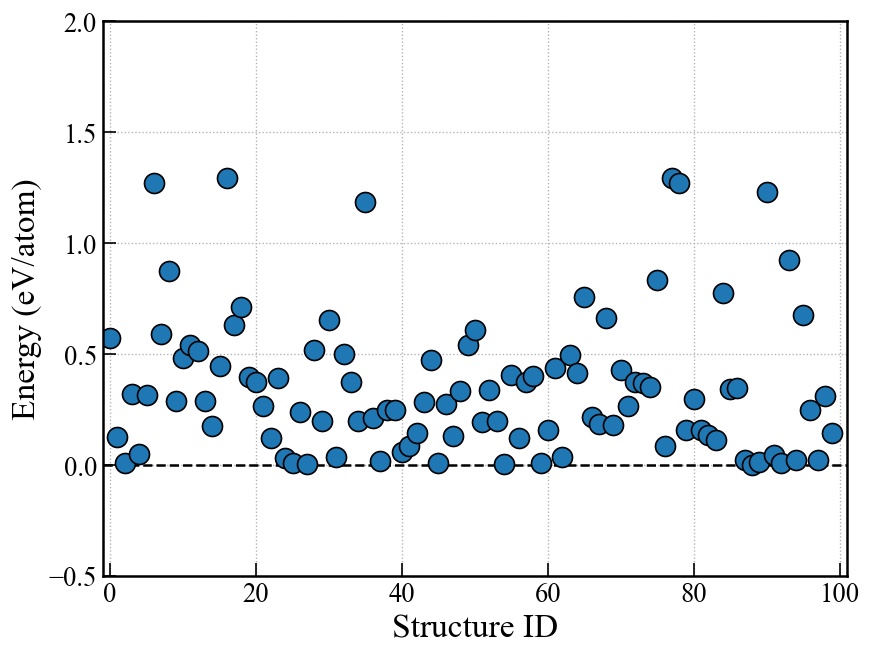

In [88]:
#プロット
fig, ax = action.plot_E(
              title=None,
              ymax=2.0,
              ymin=-0.5,
              markersize=12,
              marker_edge_width=1.0,
              marker_edge_color='black',
              alpha=1.0,
          )

# Convex hull plot for EA-vc
## Interactive plot using Plotly

- cgen: Which generation’s data to plot up to. If None, data will be plotted up to the latest generation.
- show_unstable: The maximum hull distance value to display on the plot
- ternary_style  
  - Binary system: ternary_style = '2d'
  - Ternary system: ternary_style = '2d', '3d'
  - Quaternary system: ternary_style = '3d'

In [89]:
action.interactive_plot_convex_hull(cgen=None, show_unstable=0.2, ternary_style='2d')

FileNotFoundError: [Errno 2] No such file or directory: './data/pkl_data/pd_data.pkl'

## Binary system, matplotlib
This is only for binary systems.

- cgen: Which generation’s data to plot up to. If None, data will be plotted up to the latest generation.
- show_max: The maximum formation energy to display on the plot
- label_stable: Whether to display the labels (compositions) of stable structures
- vmax: The maximum hull distance in the color bar
- bottom_margin: Bottom margin of y-axis

In [ ]:
fig, ax = action.plot_convex_hull_binary(
              cgen=None,
              show_max=0.2,
              label_stable=True,
              vmax=0.2,
              bottom_margin=0.02,
          )
fig    # to show plot in jupyter

FileNotFoundError: [Errno 2] No such file or directory: './data/pkl_data/pd_data.pkl'

## Ternary system, matplotlib
This is only for ternary systems.

- show_max: The maximum hull distance value to display on the plot
- label_stable: Whether to display the labels (compositions) of stable structures
- vmax: The maximum value of the color bar


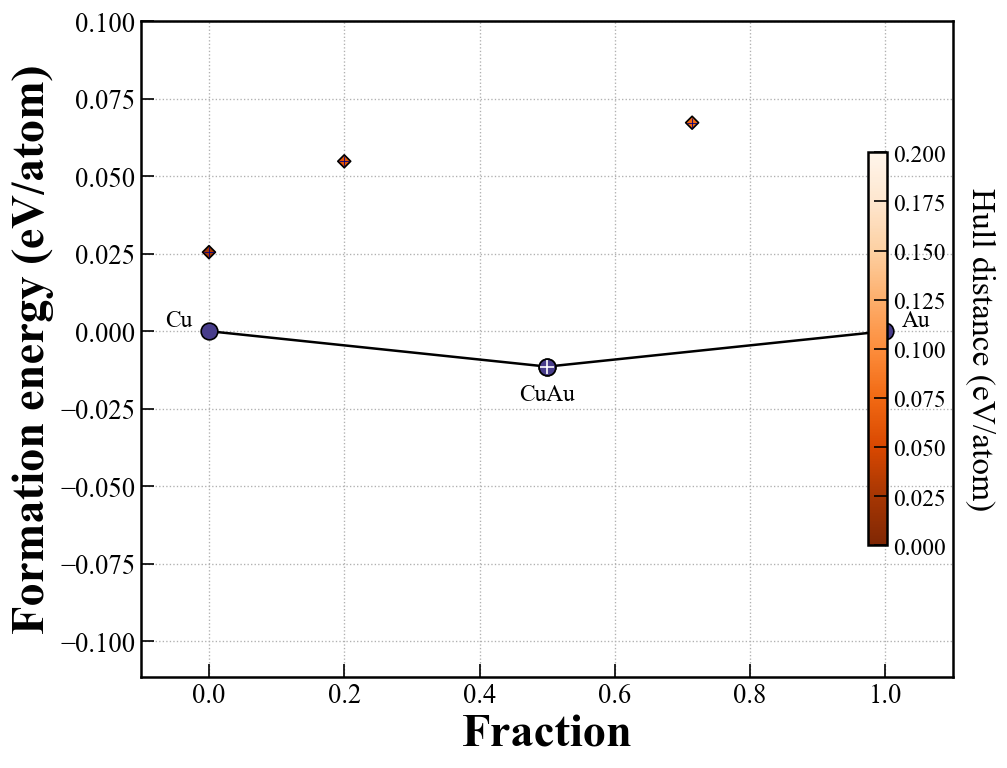

In [ ]:
fig, ax = action.plot_convex_hull_ternary(
              cgen=None,
              show_max=0.2,
              label_stable=True,
              vmax=0.2,
          )
fig    # to show plot in jupyter